Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [1]:
#Exercício 1 - Treinamento do modelo baseado em árvore de decisão
# Passo 1: Passo 1: Passo 1: Carregar o Conjunto de Dados Digits
from sklearn.datasets import load_digits
import numpy as np

# Carregar o dataset digits
digits = load_digits()
X, y = digits.data, digits.target

# Verificar o intervalo atual dos dados
print(f"Valores mínimos e máximos dos pixels: {X.min()}, {X.max()}")

#Passo 2: Pré-processar os Dados para 256 Níveis de Cinza
# Escalar os dados para 256 níveis de cinza
X = (X / X.max()) * 255
X = X.astype(np.uint8)  # Converte para inteiro de 8 bits

# Verificar a nova escala dos dados
print(f"Novos valores mínimos e máximos dos pixels: {X.min()}, {X.max()}")

#Passo 3: Dividir os Dados em Conjunto de Treinamento e Teste
from sklearn.model_selection import train_test_split

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Passo 4: Treinar o Modelo de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo de árvore de decisão
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Treinar o modelo
tree_clf.fit(X_train, y_train)

# Fazer previsões
y_pred = tree_clf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

#Passo 5: Ajuste dos Parâmetros
# Testando diferentes profundidades
for depth in [5, 10, 15, 20, None]:
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia com profundidade {depth}: {accuracy:.4f}")

Valores mínimos e máximos dos pixels: 0.0, 16.0
Novos valores mínimos e máximos dos pixels: 0, 255
Acurácia do modelo: 0.8500
Acurácia com profundidade 5: 0.6639
Acurácia com profundidade 10: 0.8500
Acurácia com profundidade 15: 0.8417
Acurácia com profundidade 20: 0.8417
Acurácia com profundidade None: 0.8417


In [2]:
#Exercício 2 - Avaliação dos ganhos com a utilização de modelos Ensemble
#Passo 1: Carregar e Pré-processar o Conjunto de Dados digits
from sklearn.datasets import load_digits
import numpy as np

# Carregar o dataset digits
digits = load_digits()
X, y = digits.data, digits.target

# Escalar os dados para 256 níveis de intensidade
X = (X / X.max()) * 255
X = X.astype(np.uint8)  # Converte para inteiros de 8 bits

# Dividir os dados em treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Passo 2: Treinar o Modelo de Árvore de Decisão Simples
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo de árvore de decisão
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Treinar o modelo
tree_clf.fit(X_train, y_train)

# Fazer previsões
y_pred_tree = tree_clf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Acurácia do modelo de árvore de decisão: {accuracy_tree:.4f}")

#Passo 3: Treinar o Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

# Criar o modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Treinar o modelo
rf_clf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf_clf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do modelo Random Forest: {accuracy_rf:.4f}")

#Passo 4: Treinar o Modelo XGBoost
from xgboost import XGBClassifier

# Criar o modelo XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=10, random_state=42)

# Treinar o modelo
xgb_clf.fit(X_train, y_train)

# Fazer previsões
y_pred_xgb = xgb_clf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia do modelo XGBoost: {accuracy_xgb:.4f}")

#Passo 5: Comparação dos Resultados
print(f"Acurácia do modelo de Árvore de Decisão: {accuracy_tree:.4f}")
print(f"Acurácia do modelo Random Forest: {accuracy_rf:.4f}")
print(f"Acurácia do modelo XGBoost: {accuracy_xgb:.4f}")


Acurácia do modelo de árvore de decisão: 0.8500


Acurácia do modelo Random Forest: 0.9722


/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:54:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia do modelo XGBoost: 0.9694
Acurácia do modelo de Árvore de Decisão: 0.8500
Acurácia do modelo Random Forest: 0.9722
Acurácia do modelo XGBoost: 0.9694


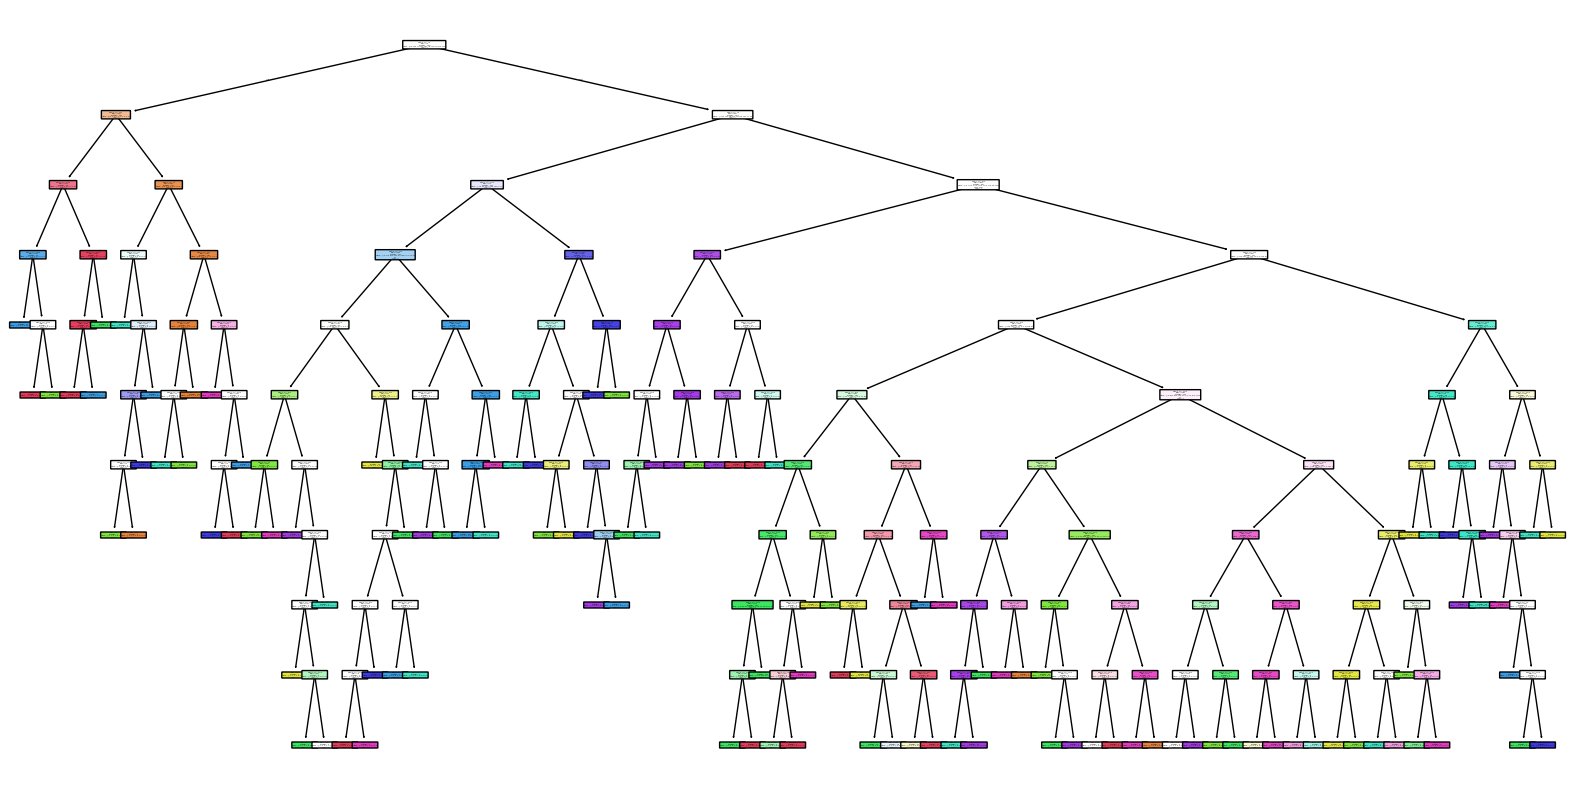

Impureza de Gini no nó raiz: 0.8999
Entropia no nó raiz: 3.3209


In [3]:
#Exercício 3 - Visualização da árvore de decisão e Medida de Impureza
#Passo 1: Visualizar a Árvore de Decisão
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=digits.feature_names, class_names=digits.target_names.astype(str), rounded=True)
plt.show()

#Passo 3: Calcular a Medida de Impureza
# Função para calcular a impureza de Gini
def gini_impurity(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities**2)

# Função para calcular a entropia
def entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# Exemplo de cálculo de impureza para o nó raiz (todas as classes)
root_gini = gini_impurity(y_train)
root_entropy = entropy(y_train)

print(f"Impureza de Gini no nó raiz: {root_gini:.4f}")
print(f"Entropia no nó raiz: {root_entropy:.4f}")